<a href="https://colab.research.google.com/github/TJ1810/Sentiment-analysis/blob/main/Unsupervise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'sarif'
%config inlineBackend.figure_format'svg'

Import packages for machine learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
df = pd.read_csv("iris.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
df.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [ ]:
df.shape

(150, 5)

In [ ]:
df.groupby('species').size()    #Group the dataframe by the 'species' column and calculate the size of each group



species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [ ]:
features_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] #Define the list of feature columns
X = df[features_columns].values      #Extract the feature values (X) from the dataframe
y = df["species"].values            #Extract the feature values (y) from the dataframe

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()       #Create an instance of LabelEncoder
y = le.fit_transform(y)   #Apply LabelEncoder to transform the target values (y)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

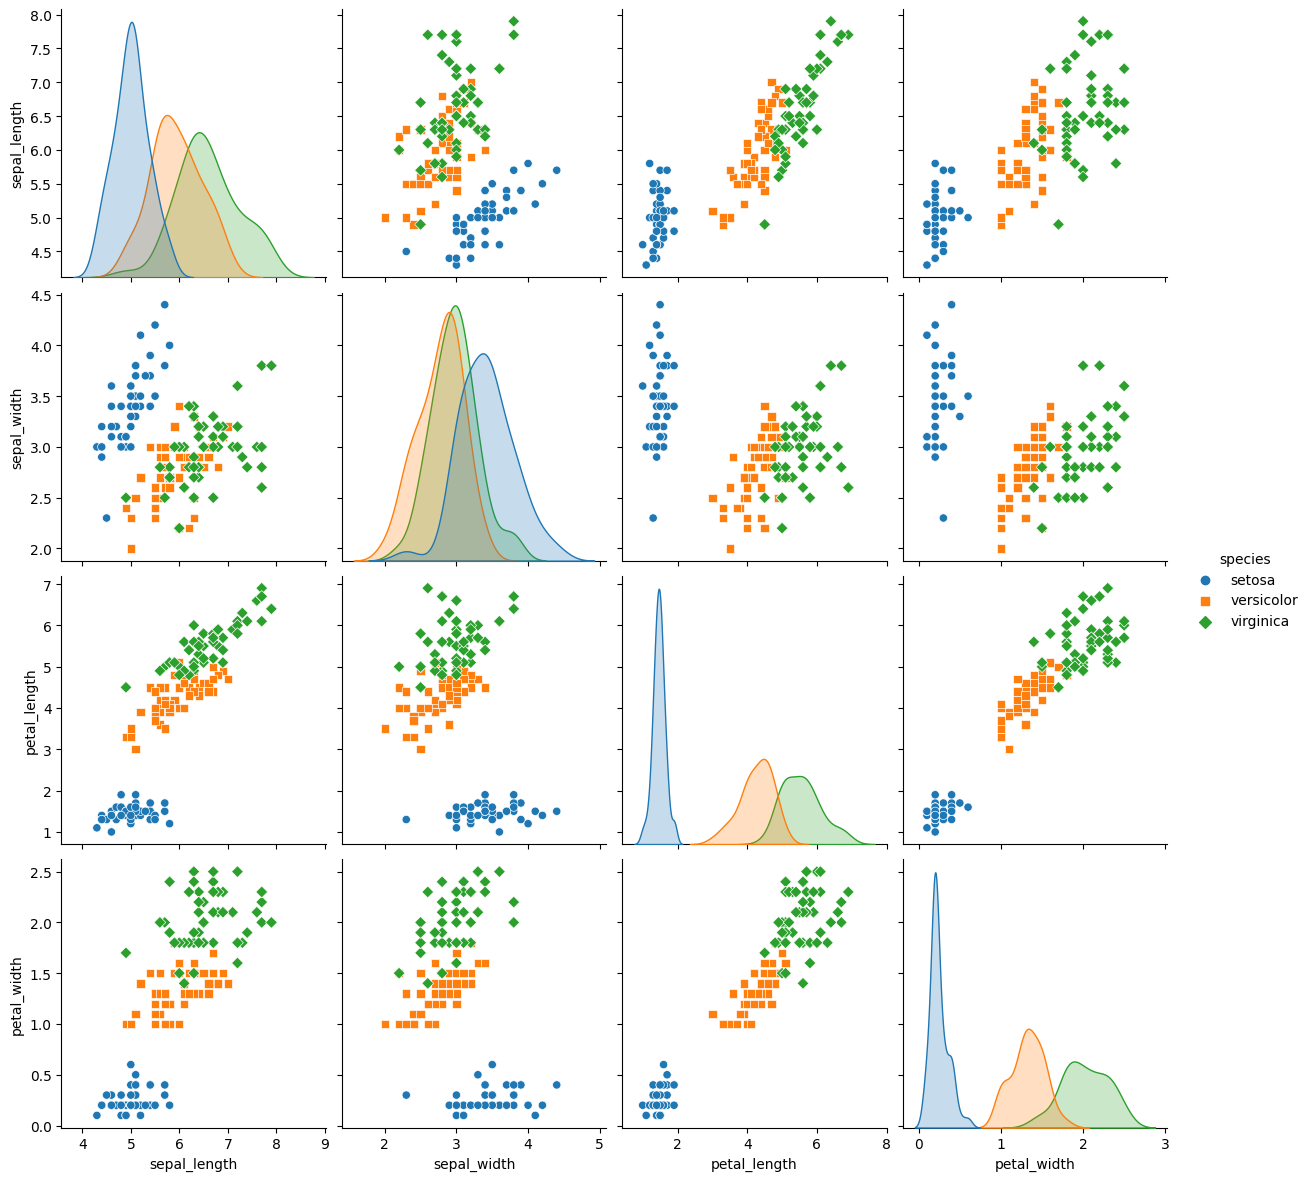

In [ ]:
plt.figure()                   #Create a new figure for the pair plot
sns.pairplot(df, hue="species", size=3, markers=["o", "s", "D"])      #Create a pair plot using seaborn
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)    #Split the data into training and test sets


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


# building confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])




calculating model accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + '%.')


Accuracy of our model is equal 96.67%.


3D visualization

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))      #Create a new figure with a 3D plot
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,   #Create a scatter plot in 3D
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for species, label in[('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:     #Add labels for each species
  ax.text3D(X[y == label, 0].mean(),
            X[y == label, 1].mean(),
            X[y == label, 2].mean(), species,
            horizontalalignment='center',
            bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("SepalWidth [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Sepal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()






<ipython-input-23-def4fdb87011>:16: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-23-def4fdb87011>:18: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-23-def4fdb87011>:20: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


<Figure size 2000x1500 with 0 Axes>